In [56]:
# Name: Akanksha Rajput
# Title: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
# Dataset: https://bit.ly/2TK5Xn5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', engine = 'python')

In [3]:
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'extended':'Extended', 'iday':'Day', 'country_txt':'Country', 'provstate':'State', 'target1':'Target', 'attacktype1_txt':'AttackType', 'nkill':'Killed', 'nwound':'Wounded', 'weaptype1_txt':'Weapon_Type', 'targtype1_txt':'Target_Type', 'region_txt':'Region', 'city':'City', 'gname':'Group', 'summary':'Summary', 'motive':'Motive'}, inplace=True)

In [4]:
df=df[['Year','Month','Day','Country','State','Region','City','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_Type','Weapon_Type','Motive']]

In [5]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
City              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_Type         0
Weapon_Type         0
Motive         131130
dtype: int64

In [6]:
df.head()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_Type,Weapon_Type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
df.tail()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_Type,Weapon_Type,Motive
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN
181690,2017,12,31,Philippines,Maguindanao,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN


In [8]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [9]:
df.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


In [10]:
print("Country with the most attacks:", df['Country'].value_counts().idxmax())
print("City with most attacks:", df['City'].value_counts().index[1])
print("Region with the most attacks:", df['Region'].value_counts().idxmax())
print("Year with the most attacks:", df['Year'].value_counts().idxmax())
print("Month with the most attacks:", df['Month'].value_counts().idxmax())
print("Group with the most attacks:", df['Group'].value_counts().index[1])
print("Most Attack Types:", df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


c:\users\akansha rajput\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


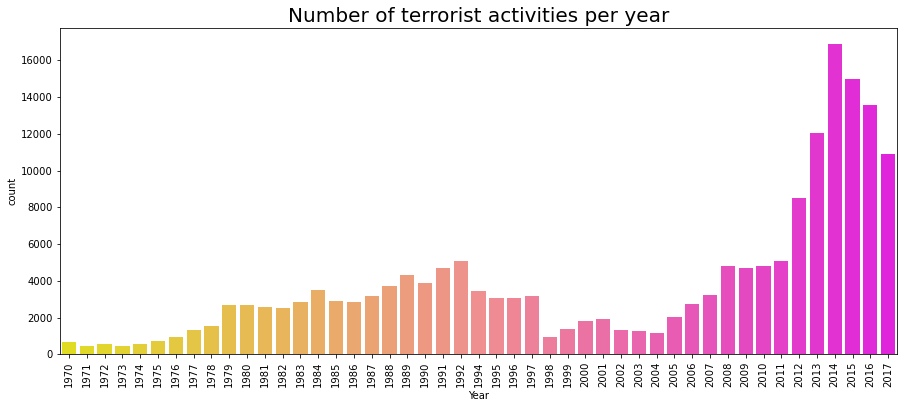

In [11]:
# Number of terrorist activities each year
plt.figure(figsize=(15,6))
sns.countplot('Year', data = df, palette='spring_r')
plt.xticks(rotation=90)
plt.title('Number of terrorist activities per year', fontsize=20)
plt.show()

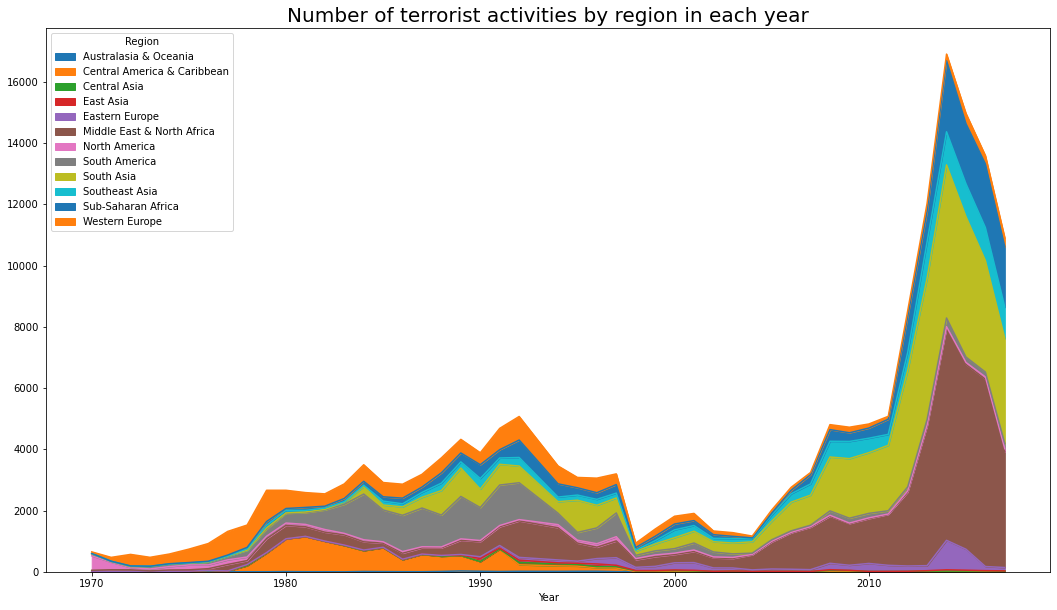

In [12]:
# Number of terrorist activities by region in each year
pd.crosstab(df.Year, df.Region).plot(kind='area', figsize=(18,10))
plt.title('Number of terrorist activities by region in each year', fontsize=20)
plt.ylabel;('Number of attacks')
plt.show()

In [13]:
# Calculating casualties
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualties'] = df['Killed'] + df['Wounded']

In [14]:
df1 = df.sort_values(by = 'casualties', ascending=False)

In [15]:
heat = df1.pivot_table(index = 'Country', columns = 'Year', values = 'casualties')
heat.fillna(0,inplace=True)

In [16]:
heat.head()

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.000000,...,5.852657,5.306163,5.273063,8.232779,5.569775,5.565489,5.770285,6.848029,7.808905,8.570721
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,5.392523,3.842593,3.290000,3.933333,3.292683,6.772727,5.153846,2.500000,1.222222,2.214286
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,16.333333,...,0.000000,2.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.666667


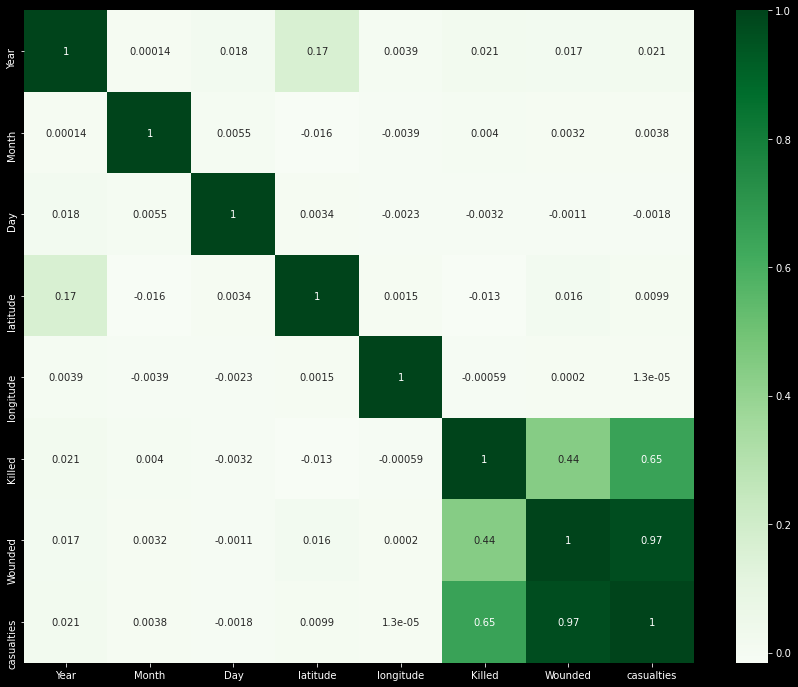

In [17]:
from matplotlib import style
style.use('dark_background')
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap='Greens')

In [18]:
df.Country.value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

c:\users\akansha rajput\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


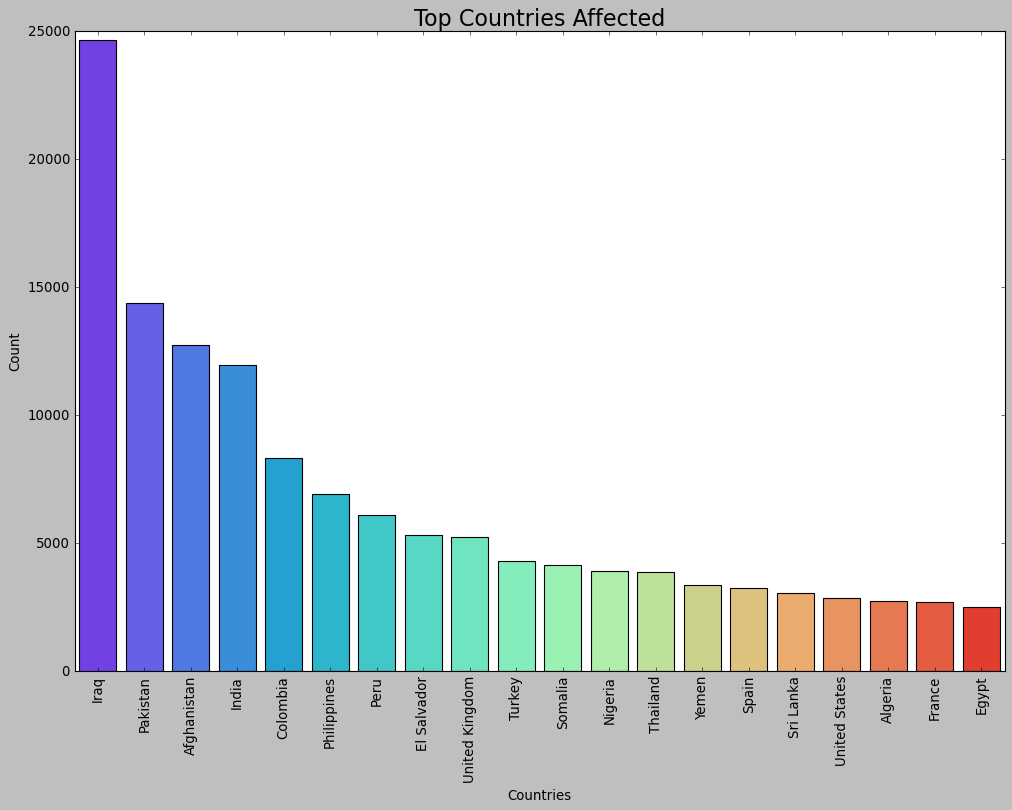

In [19]:
# Countries affected by terrorism
from matplotlib import style
style.use('classic')
plt.figure(figsize=(15,10))
sns.barplot(df['Country'].value_counts()[:20].index, df['Country'].value_counts()[:20].values, palette='rainbow')
plt.title('Top Countries Affected', fontsize=20)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

c:\users\akansha rajput\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


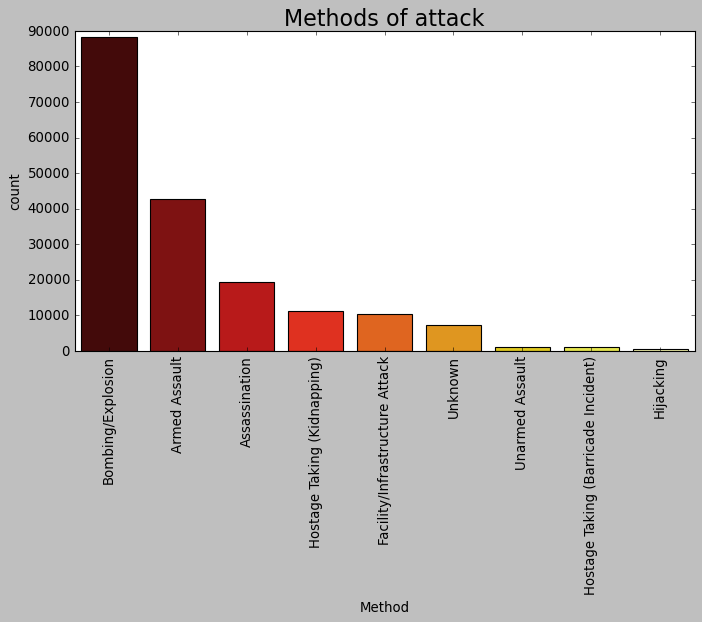

In [35]:
# Methods of attack
plt.figure(figsize=(10,5))
sns.countplot(df['AttackType'], data = df, order = df['AttackType'].value_counts().index, palette = 'hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Methods of attack', fontsize=20)
plt.show()

c:\users\akansha rajput\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


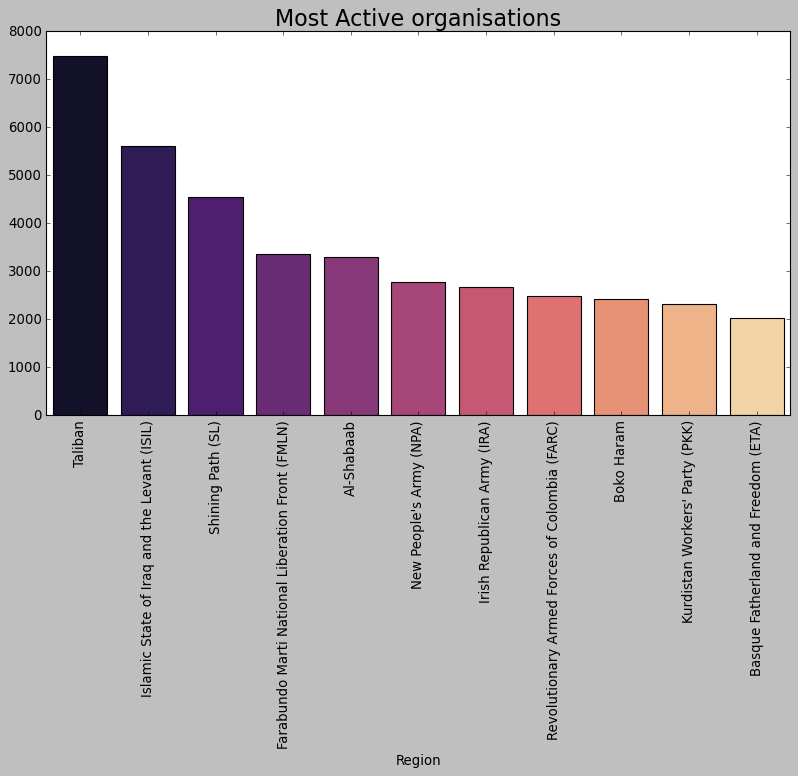

In [46]:
# most active organisations
plt.figure(figsize=(12,6))
sns.barplot(df['Group'].value_counts()[1:12].index, df['Group'].value_counts()[1:12].values, palette = 'magma')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.title('Most Active organisations', fontsize=20)
plt.show()

c:\users\akansha rajput\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


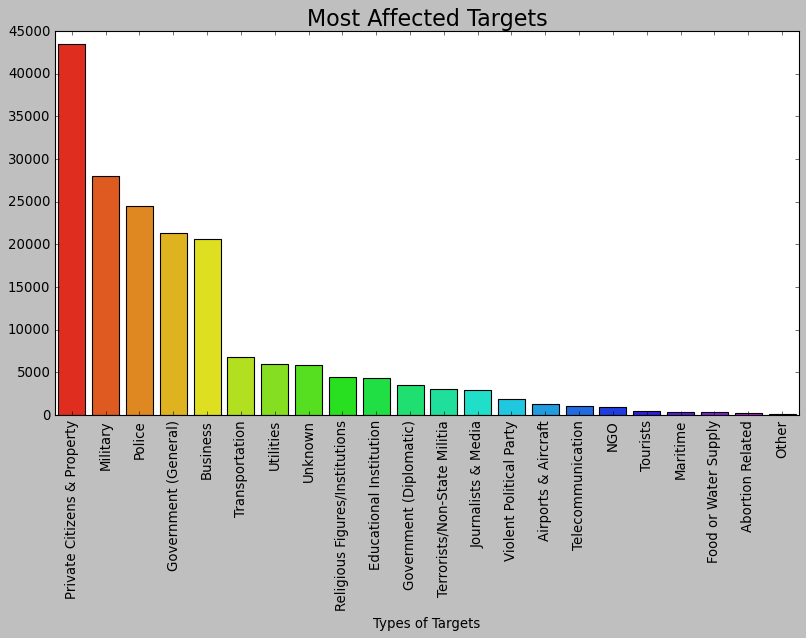

In [50]:
# Most affected targets
plt.figure(figsize=(12,6))
sns.barplot(df['Target_Type'].value_counts().index, df['Target_Type'].value_counts().values, palette = 'gist_rainbow')
plt.xticks(rotation=90)
plt.xlabel('Types of Targets')
plt.title('Most Affected Targets', fontsize=20)
plt.show()

c:\users\akansha rajput\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'centre left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  
c:\users\akansha rajput\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'centre left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


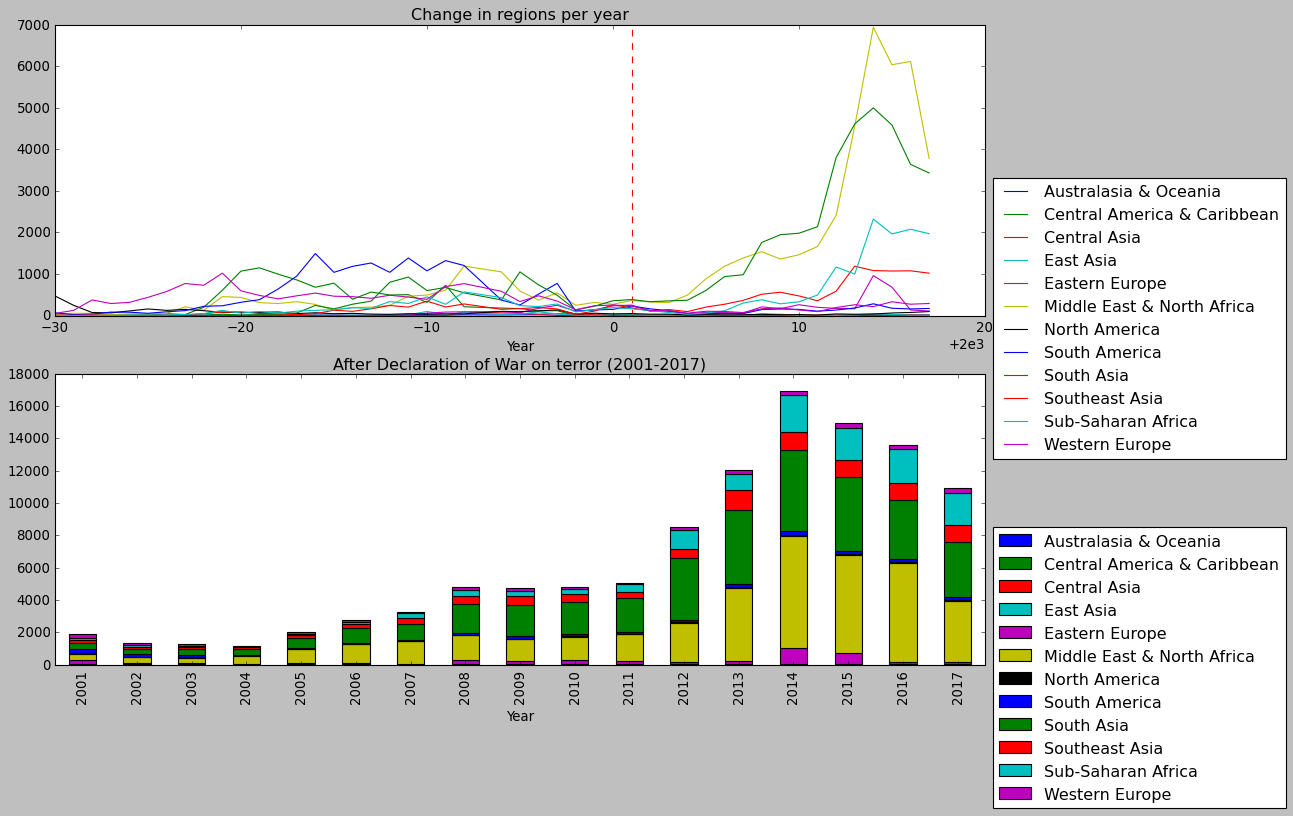

In [53]:
# Before and after the war on terror
df_after = df[df['Year']>=2001]
fig, ax = plt.subplots(figsize = (15,10), nrows=2, ncols=1)
ax[0] = pd.crosstab(df.Year, df.Region).plot(ax=ax[0])
ax[0].set_title('Change in regions per year')
ax[0].legend(loc='centre left', bbox_to_anchor = (1, 0.5))
ax[0].vlines(x = 2001, ymin = 0, ymax = 7000, colors='red', linestyles='--')
pd.crosstab(df_after.Year, df_after.Region).plot.bar(stacked=True, ax=ax[1])
ax[1].set_title('After Declaration of War on terror (2001-2017)')
ax[1].legend(loc = 'centre left', bbox_to_anchor = (1,0.5))
plt.show()